In [1]:
# Импортируем библиотеки

import numpy as np
import pandas as pd
import seaborn as sns
sns.set_palette('husl')
import matplotlib.pyplot as plt
# отображение графиков в ячейках Jupyter Notebook.
%matplotlib inline 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

ОПИСАНИЕ ДАТАСЕТА

Набор данных был собран случайным образом из базы данных иранской телекоммуникационной компании за период в 12 месяцев.

Call Failures: Количество сбоев при вызове
Complains: Количество жалоб: двоичное (0: Жалоб нет, 1: жалоба)
Subscription Length: Продолжительность подписки: общее количество месяцев подписки
Charge Amount: Сумма списания: Порядковый номер (0: наименьшая сумма, 9: наибольшая сумма)
Seconds of Use: Количество секунд использования: общее количество звонков в секундах
Frequency of use:  Частота использования: общее количество звонков
Frequency of SMS: Частота отправки SMS: общее количество текстовых сообщений
Distinct Called Numbers: Различные вызываемые номера: общее количество различных телефонных звонков 
Age Group:  порядковый номер (1: младший возраст, 5: старший возраст)
Tariff Plan: Тарифный план: бинарный (1: Оплата по мере поступления, 2: договорный)
Status: Статус: бинарный (1: активен, 2: неактивен)
Age: Возраст
Customer Value: Ценность клиента: Рассчитанная стоимость клиента
Churn: Отток: бинарный (1: отток, 0: отток не осуществляется) - Классовая метка

# Загрузка данных

In [2]:
mushr = pd.read_csv('Customer Churn.csv')
mushr

,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Age,Customer Value,Churn
0,8,0,38,0,4370,71,5,17,3,1,1,30,197.640,0
1,0,0,39,0,318,5,7,4,2,1,2,25,46.035,0
2,10,0,37,0,2453,60,359,24,3,1,1,30,1536.520,0
3,10,0,38,0,4198,66,1,35,1,1,1,15,240.020,0
4,3,0,38,0,2393,58,2,33,1,1,1,15,145.805,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3145,21,0,19,2,6697,147,92,44,2,2,1,25,721.980,0
3146,17,0,17,1,9237,177,80,42,5,1,1,55,261.210,0
3147,13,0,18,4,3157,51,38,21,3,1,1,30,280.320,0
3148,7,0,11,2,4695,46,222,12,3,1,1,30,1077.640,0


# Анализ данных

In [3]:
# размер датасета,3150 записей, 14 столбцов

mushr.shape

(3150, 14)

In [4]:
# отображаем первые 10 строк датасета

mushr.head(10)

,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Age,Customer Value,Churn
0,8,0,38,0,4370,71,5,17,3,1,1,30,197.640,0
1,0,0,39,0,318,5,7,4,2,1,2,25,46.035,0
2,10,0,37,0,2453,60,359,24,3,1,1,30,1536.520,0
3,10,0,38,0,4198,66,1,35,1,1,1,15,240.020,0
4,3,0,38,0,2393,58,2,33,1,1,1,15,145.805,0
5,11,0,38,1,3775,82,32,28,3,1,1,30,282.280,0
6,4,0,38,0,2360,39,285,18,3,1,1,30,1235.960,0
7,13,0,37,2,9115,121,144,43,3,1,1,30,945.440,0
8,7,0,38,0,13773,169,0,44,3,1,1,30,557.680,0
9,7,0,38,1,4515,83,2,25,3,1,1,30,191.920,0


In [5]:
import mpl_toolkits.mplot3d  # noqa: F401


from sklearn import datasets
from sklearn.cluster import KMeans

In [6]:
#Выводим информацию о наборе данных
mushr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Call  Failure            3150 non-null   int64  
 1   Complains                3150 non-null   int64  
 2   Subscription  Length     3150 non-null   int64  
 3   Charge  Amount           3150 non-null   int64  
 4   Seconds of Use           3150 non-null   int64  
 5   Frequency of use         3150 non-null   int64  
 6   Frequency of SMS         3150 non-null   int64  
 7   Distinct Called Numbers  3150 non-null   int64  
 8   Age Group                3150 non-null   int64  
 9   Tariff Plan              3150 non-null   int64  
 10  Status                   3150 non-null   int64  
 11  Age                      3150 non-null   int64  
 12  Customer Value           3150 non-null   float64
 13  Churn                    3150 non-null   int64  
dtypes: float64(1), int64(13)

In [7]:
mushr.describe()

,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Age,Customer Value,Churn
count,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000
mean,7.627937,0.076508,32.541905,0.942857,4472.459683,69.460635,73.174921,23.509841,2.826032,1.077778,1.248254,30.998413,470.972916,0.157143
std,7.263886,0.265851,8.573482,1.521072,4197.908687,57.413308,112.237560,17.217337,0.892555,0.267864,0.432069,8.831095,517.015433,0.363993
min,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,15.000000,0.000000,0.000000
25%,1.000000,0.000000,30.000000,0.000000,1391.250000,27.000000,6.000000,10.000000,2.000000,1.000000,1.000000,25.000000,113.801250,0.000000
50%,6.000000,0.000000,35.000000,0.000000,2990.000000,54.000000,21.000000,21.000000,3.000000,1.000000,1.000000,30.000000,228.480000,0.000000
75%,12.000000,0.000000,38.000000,1.000000,6478.250000,95.000000,87.000000,34.000000,3.000000,1.000000,1.000000,30.000000,788.388750,0.000000
max,36.000000,1.000000,47.000000,10.000000,17090.000000,255.000000,522.000000,97.000000,5.000000,2.000000,2.000000,55.000000,2165.280000,1.000000


count: количество непустых значений.
mean: среднее значение.
std: стандартное отклонение.
min: минимальное значение.
25%: 25-й процентиль (первый квартиль).
50%: 50-й процентиль (медиана).
75%: 75-й процентиль (третий квартиль).
max: максимальное значение.

In [8]:
# выводим название стлобцов
mushr.columns

Index(['Call  Failure', 'Complains', 'Subscription  Length', 'Charge  Amount',
       'Seconds of Use', 'Frequency of use', 'Frequency of SMS',
       'Distinct Called Numbers', 'Age Group', 'Tariff Plan', 'Status', 'Age',
       'Customer Value', 'Churn'],
      dtype='object')

In [9]:
# подсчитываем количество строк, принадлежащих [0, 1]
mushr['Churn'].value_counts()

Churn
0    2655
1     495
Name: count, dtype: int64

Видим что данные распределенны не равномерно. В классе 0: 2655 записей , в классе 1: 495.
Сбалансируем данные, оставим 495 нулей, как значения единиц

In [10]:
# Подсчёт количества единиц
count_ones = mushr['Churn'].sum()

# Выбираем случайные нули, равные количеству единиц
zeros_to_keep = mushr[mushr['Churn'] == 0].sample(n=count_ones, random_state=1)

# Объединяем выбранные нули с единицами
mushr2 = pd.concat([zeros_to_keep, mushr[mushr['Churn'] == 1]])

# Перемешиваем строки
mushr2 = mushr2.sample(frac=1, random_state=1).reset_index(drop=True)

In [11]:
# ищем уникальные элементы в столбце Churn
mushr2['Churn'].unique()

array([0, 1])

In [12]:
# подсчитываем количество строк, принадлежащих [0, 1]
mushr2['Churn'].value_counts()

Churn
0    495
1    495
Name: count, dtype: int64

In [13]:
mushr2

,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Age,Customer Value,Churn
0,0,0,21,0,1390,26,29,13,2,1,1,25,194.220,0
1,5,0,39,0,305,6,7,2,2,1,2,25,45.495,1
2,26,1,30,0,1260,47,15,18,2,1,2,25,126.315,1
3,3,1,29,0,2605,33,0,10,2,1,2,25,118.710,1
4,12,0,38,0,2383,49,32,30,4,1,2,45,140.800,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
985,4,0,33,0,1848,32,0,25,3,1,2,30,75.200,1
986,2,0,10,2,4505,46,247,14,3,1,1,30,1170.040,0
987,5,0,39,0,305,6,7,2,2,1,2,25,45.495,1
988,11,0,40,1,2855,46,301,23,3,1,1,30,1320.040,0


In [14]:
mushr2.isnull().sum()

Call  Failure              0
Complains                  0
Subscription  Length       0
Charge  Amount             0
Seconds of Use             0
Frequency of use           0
Frequency of SMS           0
Distinct Called Numbers    0
Age Group                  0
Tariff Plan                0
Status                     0
Age                        0
Customer Value             0
Churn                      0
dtype: int64

# Визуализация данных

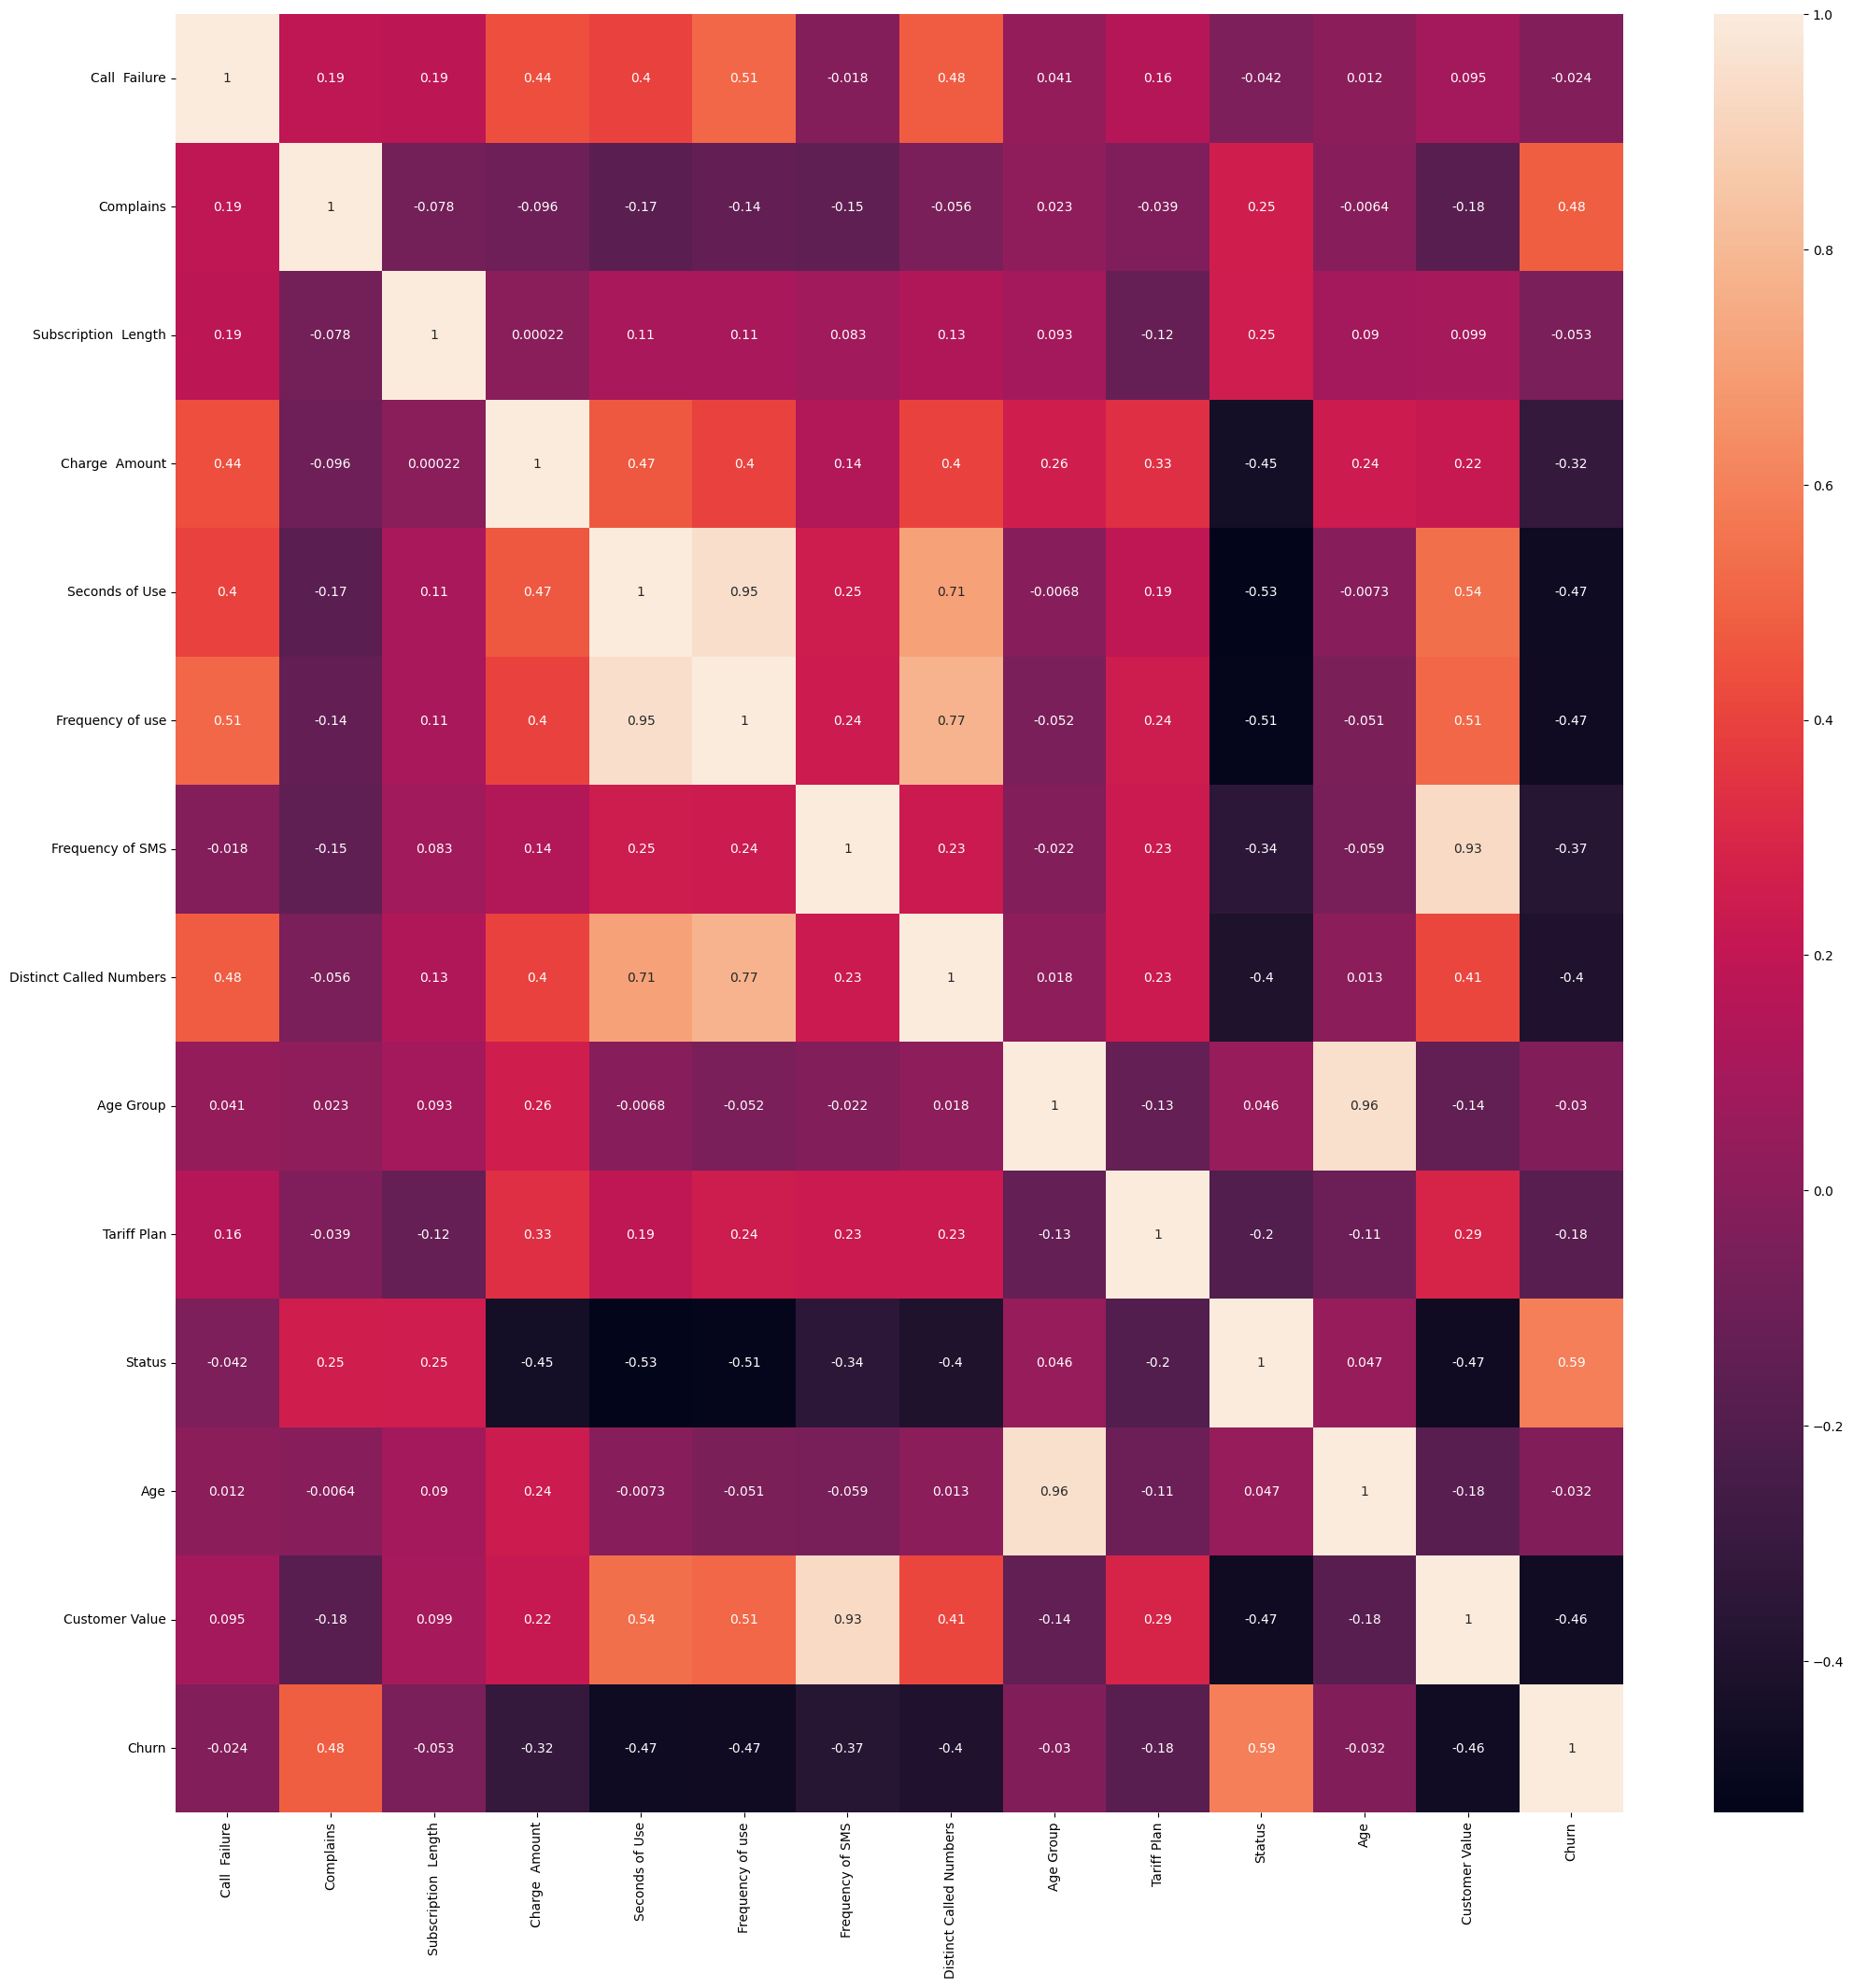

In [15]:
# Тепловая карта
# Построение тепловой карты для проверки корреляции.
# dataset.corr() используется для поиска попарной корреляции всех столбцов в кадре данных.

plt.figure(figsize=(25,25))
sns.heatmap(mushr2.corr(numeric_only = True), annot=True)
plt.show()

Из тепловой карты видно, что сильная корреляция происходит между параметрами:
Customer Value и Frequency of SMS (Чем больше клиент отправляет SMS, тем его ценность больше)
Age и Age Group (Чем старше человек тем больше его порядковый номер)
Frequency of use и Seconds of Use (Чем больше звонков, тем больше секунд использования)
Зависимости нет почти вообще между параметрами:
Charge Amount и Subscription Length (Сумма списания и кол-во месяцев подписки)



# Построение модели

## Разделение набора данных

Y  - целевая переменная, которую предсказываем. Мы ищем зависимость этой переменной от соответствующих фич.  В нашем случае это столбец Churn.

В X складываем весь набор данных без целевой переменной.


In [16]:
X = mushr2.drop(['Churn'], axis=1)
y = mushr2['Churn']
print(f'X shape: {X.shape} | y shape: {y.shape} ')

X shape: (990, 13) | y shape: (990,) 


X имеет 990 строк и 13 столбца, тогда как Y имеет 990 строк и только один столбец.


## Train Test разделение

Разделяем наш набор данных на обучающий (train) и тестовый (test) с помощью train_test_split(), мы берем 80% данных для обучения нашей модели и 20% оставляем в качестве проверочного набора данных:

In [17]:
import scipy.stats as stats
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 15, stratify=y)

stats.ttest_ind(a = y_train, b = y_test)

TtestResult(statistic=np.float64(0.0), pvalue=np.float64(1.0), df=np.float64(988.0))

## Обучение и выбор оптимальной модели

Далее попробуем следующие алгоритмы:

Logistic Regression (LR) </br>
Linear Discriminant Analysis (LDA)</br>
K-Nearest Neighbors (KNN)</br>
Classification and Regression Trees (CART)</br>
Gaussian Naive Bayes (NB)</br>
Support Vector Machines (SVM)</br>

In [18]:
# создаем лист для тех моделей, которые будем изучать
models = []
models.append(('LR', LogisticRegression(solver='lbfgs', max_iter=1000))) #логистическая регрессия (LR)
models.append(('LDA', LinearDiscriminantAnalysis())) #линейный дискриминантный анализ (LDA)
models.append(('KNN', KNeighborsClassifier())) #метод k-ближайших соседей (KNN)
models.append(('CART', DecisionTreeClassifier())) #классификатор дерева решений (CART)
models.append(('NB', GaussianNB())) #наивный байесовский классификатор (NB)
models.append(('SVC', SVC(gamma='auto'))) #опорные векторные машины (SVC)

# оцениваем их метрики
results = []
model_names = []
for name, model in models:
  kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
  cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
  results.append(cv_results)
  model_names.append(name)
  print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

C:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stab

LR: 0.858687 (0.035567)
LDA: 0.863718 (0.045853)
KNN: 0.756329 (0.038665)
CART: 0.887769 (0.045699)
NB: 0.781661 (0.047077)
SVC: 0.618687 (0.024435)


Classification and Regression Trees и Linear Discriminant Analysis показали лучшие метрики среди всех алгоритмов.
Далее работаем с Classification and Regression Trees.

Давайте обучим модель CART на нашем обучающем наборе и сделаем прогноз на тестовом наборе на следующем шаге.

## Обучение конкретной модели
Определяем нашу модель CART
После этого подгоняем/обучаем модель на X_train и Y_train с помощью метода .fit().
Затем мы делаем прогноз на X_test с помощью метода .predict().

In [19]:
# Создаем модель CART
cart_model = DecisionTreeClassifier()

# Обучаем модель на тренировочных данных
cart_model.fit(X_train, y_train)

# Делаем прогноз на тестовых данных
y_pred = cart_model.predict(X_test)

# Выводим результаты
print("Прогнозы на тестовых данных:", y_pred)


Прогнозы на тестовых данных: [0 1 0 1 1 0 1 1 1 0 1 1 1 0 0 1 1 1 0 1 0 1 0 0 0 1 1 1 1 1 0 1 1 0 0 0 0
 0 1 0 1 1 0 0 1 0 0 1 0 0 1 1 0 1 1 1 0 1 0 0 0 1 0 1 0 1 0 1 1 1 0 1 0 0
 1 0 0 0 1 0 0 1 1 1 1 0 1 1 0 0 1 0 1 0 0 0 1 0 1 1 1 0 1 0 0 1 1 1 0 0 1
 1 1 1 0 1 0 1 0 1 0 1 1 0 1 1 0 1 0 1 1 1 1 0 0 0 0 0 0 0 1 0 0 0 1 1 1 0
 0 1 1 0 0 0 1 1 1 0 0 1 1 1 0 0 1 1 0 1 1 0 0 0 1 0 0 0 0 0 0 1 0 1 1 1 0
 0 0 0 0 0 1 0 0 0 1 1 1 1]


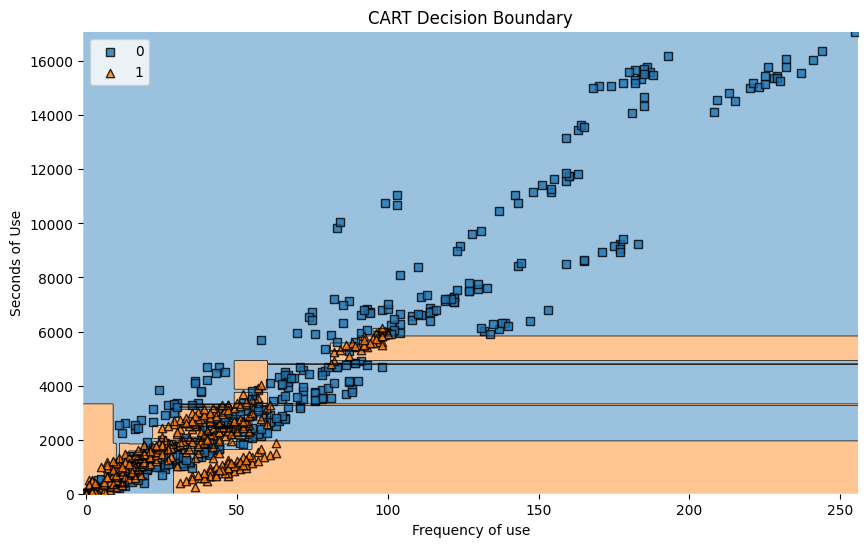

In [21]:
from mlxtend.plotting import plot_decision_regions

# Подготовка данных
X_2d = X_train[['Frequency of use', 'Seconds of Use']].values
y_2d = y_train.values

# Обучение модели CART 
cart_model_2d = DecisionTreeClassifier()
cart_model_2d.fit(X_2d, y_2d)

# Визуализация решения
plt.figure(figsize=(10, 6))
plt.title('CART Decision Boundary')
plot_decision_regions(
        X=X_2d,
        y=y_2d,
        clf=cart_model_2d,
        legend=2)

plt.xlabel('Frequency of use')
plt.ylabel('Seconds of Use')
plt.legend(loc='upper left')
plt.show()



C:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


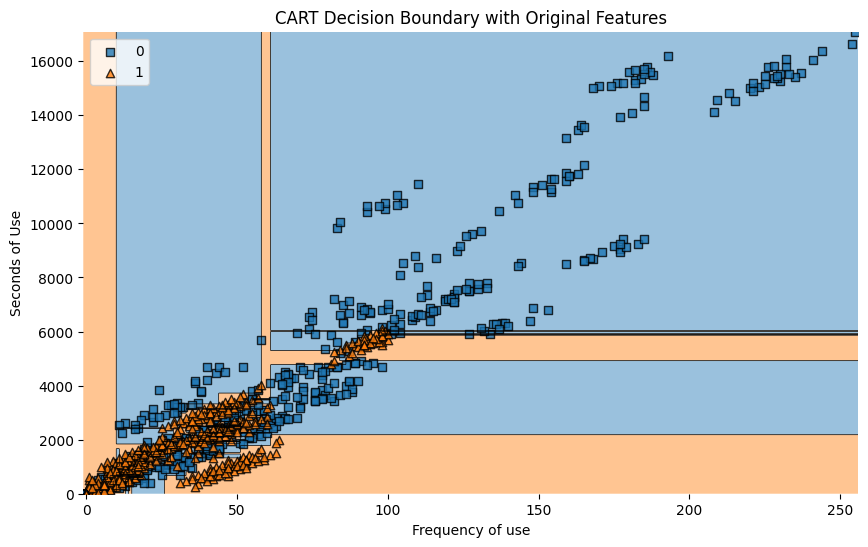

In [22]:
# Подготовка данных
df = mushr2['Churn']
Xs = mushr2[['Frequency of use', 'Seconds of Use']]
ys = df.values

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(Xs, ys, random_state=0)

# Обучение модели CART на обучающих данных
cart_model = DecisionTreeClassifier()
cart_model.fit(X_train, y_train)

# Визуализация решения
plt.figure(figsize=(10, 6))
plt.title('CART Decision Boundary with Original Features')
plot_decision_regions(X=Xs.values, y=ys, clf=cart_model, legend=2)

plt.xlabel('Frequency of use')
plt.ylabel('Seconds of Use')
plt.legend(loc='upper left')
plt.show()



In [23]:
from sklearn import model_selection, preprocessing, feature_selection, ensemble, linear_model, metrics, decomposition


# Предсказание на тестовых данных
predicted = cart_model.predict(X_test)

# Оценка точности
accuracy = metrics.accuracy_score(y_test, predicted)
print("Accuracy:", round(accuracy, 2))

# Precision и Recall
recall = metrics.recall_score(y_test, predicted, average="weighted")
precision = metrics.precision_score(y_test, predicted, average="weighted")

print("Recall (all 1s predicted right):", round(recall, 2))
print("Precision (confidence when predicting a 1):", round(precision, 2))

# Подробный отчет о классификации
print("Detail:")
print(metrics.classification_report(y_test, predicted, target_names=[str(i) for i in np.unique(y_test)]))

Accuracy: 0.77
Recall (all 1s predicted right): 0.77
Precision (confidence when predicting a 1): 0.77
Detail:
              precision    recall  f1-score   support

           0       0.77      0.76      0.76       124
           1       0.76      0.77      0.77       124

    accuracy                           0.77       248
   macro avg       0.77      0.77      0.77       248
weighted avg       0.77      0.77      0.77       248



для класса 0: из 124 было правильно предсказано 77%
для класса 1: из 124 было правильно предсказано 78%